In [1]:
#cargamos las bibliotecas a utilizar y asignamos nombres cortos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df0 = pd.read_csv('valle.txt', skiprows=20, sep='\s+', header=None, names=["FECHA","PRECIP", "EVAP","TMAX", "TMIN"])
sns.set(rc={'figure.figsize':(12,8.27)})

In [3]:
df0.head()

,FECHA,PRECIP,EVAP,TMAX,TMIN
0,20/01/1961,11,Nulo,21,10
1,21/01/1961,0,Nulo,23,12
2,22/01/1961,2,Nulo,23,11
3,23/01/1961,0,Nulo,22,8
4,24/01/1961,0,Nulo,24,6


In [4]:
#le damos estructura a los datos
df = pd.DataFrame(df0)

In [5]:
#vemos los tipos de datos asignados por pandas
df.dtypes

FECHA     object
PRECIP    object
EVAP      object
TMAX      object
TMIN      object
dtype: object

In [6]:
df['PRECIP'] = df['PRECIP'].str.replace('Nulo','NaN').astype(np.float64)
df['EVAP'] = df['EVAP'].str.replace('Nulo','NaN').astype(np.float64)
df['TMAX'] = df['TMAX'].str.replace('Nulo','NaN').astype(np.float64)
df['TMIN'] = df['TMIN'].str.replace('Nulo','NaN').astype(np.float64)

In [7]:
df['FECHA'] = pd.to_datetime(df.apply(lambda x: x['FECHA'], 1), dayfirst=True)

In [8]:
df0.head()

,FECHA,PRECIP,EVAP,TMAX,TMIN
0,20/01/1961,11.0,NaN,21.0,10.0
1,21/01/1961,0.0,NaN,23.0,12.0
2,22/01/1961,2.0,NaN,23.0,11.0
3,23/01/1961,0.0,NaN,22.0,8.0
4,24/01/1961,0.0,NaN,24.0,6.0


In [9]:
df.dtypes

FECHA     datetime64[ns]
PRECIP           float64
EVAP             float64
TMAX             float64
TMIN             float64
dtype: object

In [10]:
df.tail()

,FECHA,PRECIP,EVAP,TMAX,TMIN
7735,2014-08-27,0.0,5.1,27.0,13.5
7736,2014-08-28,0.0,6.7,26.5,14.0
7737,2014-08-29,0.0,4.6,26.5,15.0
7738,2014-08-30,9.0,1.9,23.5,14.5
7739,2014-08-31,17.0,2.6,20.0,14.5


In [11]:
df.dtypes

FECHA     datetime64[ns]
PRECIP           float64
EVAP             float64
TMAX             float64
TMIN             float64
dtype: object

In [12]:
df.mean()

PRECIP     2.628546
EVAP       4.525241
TMAX      25.246330
TMIN      11.504829
dtype: float64

In [13]:
df.std()

PRECIP    6.507803
EVAP      2.144271
TMAX      3.125465
TMIN      3.544148
dtype: float64

In [14]:
df.mean()

PRECIP     2.628546
EVAP       4.525241
TMAX      25.246330
TMIN      11.504829
dtype: float64

In [15]:
df.std()

PRECIP    6.507803
EVAP      2.144271
TMAX      3.125465
TMIN      3.544148
dtype: float64

In [16]:
df.median()

PRECIP     0.0
EVAP       4.1
TMAX      25.0
TMIN      12.0
dtype: float64

In [17]:
df.max()

FECHA     2014-08-31 00:00:00
PRECIP                     78
EVAP                     13.9
TMAX                     34.5
TMIN                       22
dtype: object

In [18]:
df.min()

FECHA     1961-01-20 00:00:00
PRECIP                      0
EVAP                      0.1
TMAX                       11
TMIN                        0
dtype: object

In [19]:
df.describe()

,PRECIP,EVAP,TMAX,TMIN
count,7735.000000,3950.000000,7725.000000,7703.000000
mean,2.628546,4.525241,25.246330,11.504829
std,6.507803,2.144271,3.125465,3.544148
min,0.000000,0.100000,11.000000,0.000000
25%,0.000000,2.900000,23.000000,9.500000
50%,0.000000,4.100000,25.000000,12.000000
75%,1.800000,5.900000,27.500000,14.000000
max,78.000000,13.900000,34.500000,22.000000


In [20]:
#1
df.sum()

PRECIP     20331.8
EVAP       17874.7
TMAX      195027.9
TMIN       88621.7
dtype: float64

In [21]:
#2
df['week_start'] = df['FECHA'] + pd.DateOffset(weeks=1)

In [22]:
#3
#numoero de filas y columnas
df.shape

(7740, 6)

In [23]:
#4
#descripcion del index
df.index

RangeIndex(start=0, stop=7740, step=1)

In [24]:
#5
#numero de datos
df.count()

FECHA         7740
PRECIP        7735
EVAP          3950
TMAX          7725
TMIN          7703
week_start    7740
dtype: int64

In [25]:
#6
df.corr()

,PRECIP,EVAP,TMAX,TMIN
PRECIP,1.000000,-0.192761,-0.208815,0.269042
EVAP,-0.192761,1.000000,0.667317,0.094877
TMAX,-0.208815,0.667317,1.000000,-0.079000
TMIN,0.269042,0.094877,-0.079000,1.000000


In [26]:
#7
df.PRECIP.max()

78.0

In [27]:
df['DIA'] = df['FECHA'].dt.day
df.head()

df['MES'] = df['FECHA'].dt.month
df.head()

df['AÑO'] = df['FECHA'].dt.year
df.head()

,FECHA,PRECIP,EVAP,TMAX,TMIN,week_start,DIA,MES,AÑO
0,1961-01-20,11.0,NaN,21.0,10.0,1961-01-27,20,1,1961
1,1961-01-21,0.0,NaN,23.0,12.0,1961-01-28,21,1,1961
2,1961-01-22,2.0,NaN,23.0,11.0,1961-01-29,22,1,1961
3,1961-01-23,0.0,NaN,22.0,8.0,1961-01-30,23,1,1961
4,1961-01-24,0.0,NaN,24.0,6.0,1961-01-31,24,1,1961


In [28]:
df.dtypes

FECHA         datetime64[ns]
PRECIP               float64
EVAP                 float64
TMAX                 float64
TMIN                 float64
week_start    datetime64[ns]
DIA                    int64
MES                    int64
AÑO                    int64
dtype: object

In [29]:
df_ENE=df[df.MES==1]
df_FEB=df[df.MES==2]
df_MAR=df[df.MES==3]
df_ABR=df[df.MES==4]
df_MAY=df[df.MES==5]
df_JUN=df[df.MES==6]
df_JUL=df[df.MES==7]
df_AGO=df[df.MES==8]
df_SEP=df[df.MES==9]
df_OCT=df[df.MES==10]
df_NOV=df[df.MES==11]
df_DIC=df[df.MES==12]

In [30]:
#Precipitaciones por mes
PRECIP_ENE=df_ENE.PRECIP.sum()
print("ENE = ",PRECIP_ENE)

PRECIP_FEB=df_FEB.PRECIP.sum()
print("FEB = ",PRECIP_FEB)

PRECIP_MAR=df_MAR.PRECIP.sum()
print("MAR = ",PRECIP_MAR)

PRECIP_ABR=df_ABR.PRECIP.sum()
print("ABR = ",PRECIP_ABR)

PRECIP_MAY=df_MAY.PRECIP.sum()
print("MAY = ",PRECIP_MAY)

PRECIP_JUN=df_JUN.PRECIP.sum()
print("JUN = ",PRECIP_JUN)

PRECIP_JUL=df_JUL.PRECIP.sum()
print("JUL = ",PRECIP_JUL)

PRECIP_AGO=df_AGO.PRECIP.sum()
print("AGO = ",PRECIP_AGO)

PRECIP_SEP=df_SEP.PRECIP.sum()
print("SEP = ",PRECIP_SEP)

PRECIP_OCT=df_OCT.PRECIP.sum()
print("OCT = ",PRECIP_OCT)

PRECIP_NOV=df_NOV.PRECIP.sum()
print("NOV = ",PRECIP_NOV)

PRECIP_DIC=df_DIC.PRECIP.sum()
print("DIC = ",PRECIP_DIC)

ENE =  353.4
FEB =  309.3
MAR =  106.4
ABR =  200.0
MAY =  1171.2
JUN =  4097.1
JUL =  4606.7
AGO =  4168.9
SEP =  3506.0
OCT =  1466.5
NOV =  304.0
DIC =  42.3


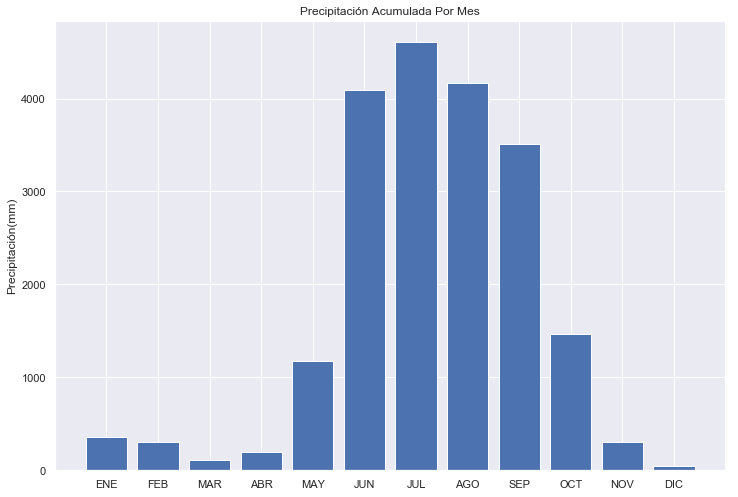

In [31]:
x = ('ENE', 'FEB', 'MAR', 'ABR', 'MAY', 'JUN', 'JUL','AGO','SEP','OCT','NOV','DIC') 
y=np.arange(len(x))
PRECIP= [PRECIP_ENE,PRECIP_FEB,PRECIP_MAR,PRECIP_ABR,PRECIP_MAY,PRECIP_JUN,PRECIP_JUL,PRECIP_AGO,PRECIP_SEP,PRECIP_OCT,PRECIP_NOV,PRECIP_DIC]
 
plt.bar(y, PRECIP, align='center')
plt.xticks(y, x)
plt.ylabel('Precipitación(mm)')
plt.title('Precipitación Acumulada Por Mes')
plt.savefig('Precip_mes',plt=2000)
plt.show()

In [32]:
#Temperaturas por mes(max)
TMAX_ENE=df_ENE.TMAX.mean()
print("ENE = ",TMAX_ENE)

TMAX_FEB=df_FEB.TMAX.mean()
print("FEB = ",TMAX_FEB)

TMAX_MAR=df_MAR.TMAX.mean()
print("MAR = ",TMAX_MAR)

TMAX_ABR=df_ABR.TMAX.mean()
print("ABR = ",TMAX_ABR)

TMAX_MAY=df_MAY.TMAX.mean()
print("MAY = ",TMAX_MAY)

TMAX_JUN=df_JUN.TMAX.mean()
print("JUN = ",TMAX_JUN)

TMAX_JUL=df_JUL.TMAX.mean()
print("JUL = ",TMAX_JUL)

TMAX_AGO=df_AGO.TMAX.mean()
print("AGO = ",TMAX_AGO)

TMAX_SEP=df_SEP.TMAX.mean()
print("SEP = ",TMAX_SEP)

TMAX_OCT=df_OCT.TMAX.mean()
print("OCT = ",TMAX_OCT)

TMAX_NOV=df_NOV.TMAX.mean()
print("NOV = ",TMAX_NOV)

TMAX_DIC=df_DIC.TMAX.mean()
print("DIC = ",TMAX_DIC)

ENE =  23.56646525679758
FEB =  25.29450726978998
MAR =  27.463289280469898
ABR =  29.295487627365357
MAY =  28.922402159244264
JUN =  25.639082058414466
JUL =  23.59620786516854
AGO =  23.51121351766513
SEP =  23.106326889279437
OCT =  23.474551971326164
NOV =  24.124080882352942
DIC =  23.3659793814433


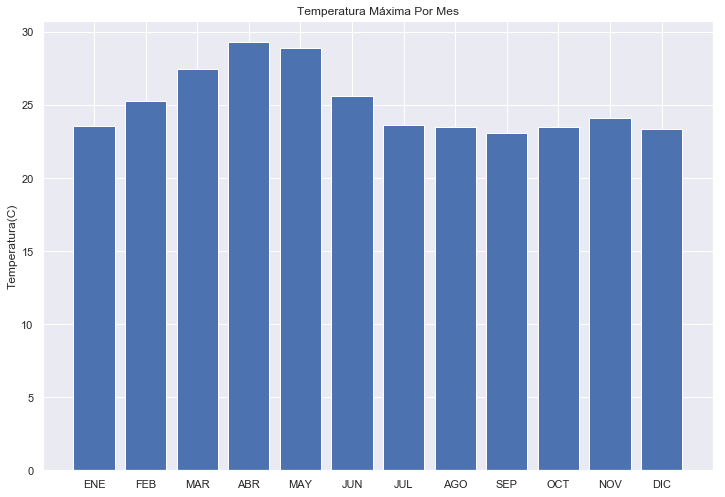

In [33]:
x = ('ENE', 'FEB', 'MAR', 'ABR', 'MAY', 'JUN', 'JUL','AGO','SEP','OCT','NOV','DIC') 
y=np.arange(len(x))
PRECIP= [TMAX_ENE,TMAX_FEB,TMAX_MAR,TMAX_ABR,TMAX_MAY,TMAX_JUN,TMAX_JUL,TMAX_AGO,TMAX_SEP,TMAX_OCT,TMAX_NOV,TMAX_DIC]
 
plt.bar(y, PRECIP, align='center')
plt.xticks(y, x)
plt.ylabel('Temperatura(C)')
plt.title('Temperatura Máxima Por Mes')
plt.savefig('Temp_mes',plt=2000)
plt.show()

In [34]:
#Temperaturas por mes(max)
TMIN_ENE=df_ENE.TMIN.mean()
print("ENE = ",TMIN_ENE)

TMIN_FEB=df_FEB.TMIN.mean()
print("FEB = ",TMIN_FEB)

TMIN_MAR=df_MAR.TMIN.mean()
print("MAR = ",TMIN_MAR)

TMIN_ABR=df_ABR.TMIN.mean()
print("ABR = ",TMIN_ABR)

TMIN_MAY=df_MAY.TMIN.mean()
print("MAY = ",TMIN_MAY)

TMIN_JUN=df_JUN.TMIN.mean()
print("JUN = ",TMIN_JUN)

TMIN_JUL=df_JUL.TMIN.mean()
print("JUL = ",TMIN_JUL)

TMIN_AGO=df_AGO.TMIN.mean()
print("AGO = ",TMIN_AGO)

TMIN_SEP=df_SEP.TMIN.mean()
print("SEP = ",TMIN_SEP)

TMIN_OCT=df_OCT.TMIN.mean()
print("OCT = ",TMIN_OCT)

TMIN_NOV=df_NOV.TMIN.mean()
print("NOV = ",TMIN_NOV)

TMIN_DIC=df_DIC.TMIN.mean()
print("DIC = ",TMIN_DIC)

ENE =  7.789879154078549
FEB =  8.311290322580644
MAR =  9.577092511013216
ABR =  11.510595065312046
MAY =  13.610767160161506
JUN =  14.383053221288515
JUL =  13.73806179775281
AGO =  13.684024577572963
SEP =  13.71298245614035
OCT =  12.433870967741937
NOV =  10.05669724770642
DIC =  8.156810035842295


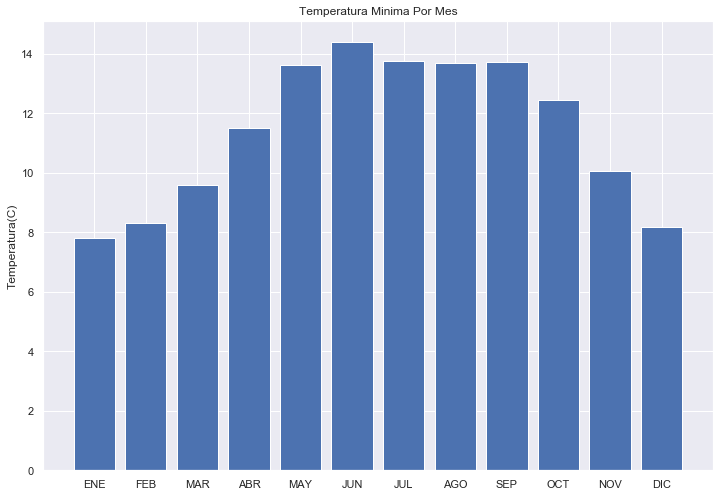

In [35]:
x = ('ENE', 'FEB', 'MAR', 'ABR', 'MAY', 'JUN', 'JUL','AGO','SEP','OCT','NOV','DIC') 
y=np.arange(len(x))
PRECIP= [TMIN_ENE,TMIN_FEB,TMIN_MAR,TMIN_ABR,TMIN_MAY,TMIN_JUN,TMIN_JUL,TMIN_AGO,TMIN_SEP,TMIN_OCT,TMIN_NOV,TMIN_DIC]
 
plt.bar(y, PRECIP, align='center')
plt.xticks(y, x)
plt.ylabel('Temperatura(C)')
plt.title('Temperatura Minima Por Mes')
plt.savefig('Temp_min',plt=2000)
plt.show()

In [36]:
init = 1961
AÑOS = [init + i for i in range(0, 54)]
PAÑO = [ df[df.AÑO==(init + i)].PRECIP.sum() for i in range(0, 54)]

In [37]:
d = {'AÑO': AÑOS, 'PRECIPITACIÓN_TOTAL': PAÑO}
df2 = pd.DataFrame(data=d)
df2.head()

,AÑO,PRECIPITACIÓN_TOTAL
0,1961,918.0
1,1962,1017.7
2,1963,343.4
3,1964,17.9
4,1965,948.1


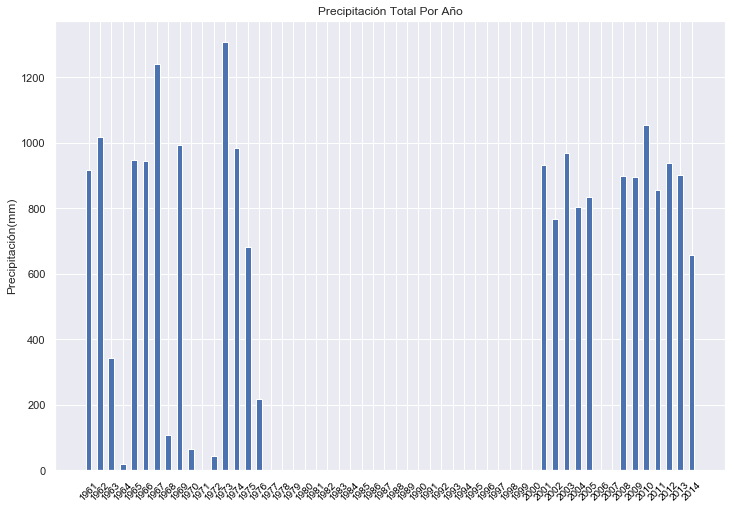

In [38]:
fecha = AÑOS
N = np.arange(len(fecha))
PRECIPIT= PAÑO
 
plt.bar(N, PRECIPIT,  width=0.5,align='center')
plt.xticks(N, fecha, size = 'small', color = 'black', rotation = 45)
plt.ylabel('Precipitación(mm)')
plt.title('Precipitación Total Por Año')
plt.savefig('Precip_anu',plt=2000)
plt.show()

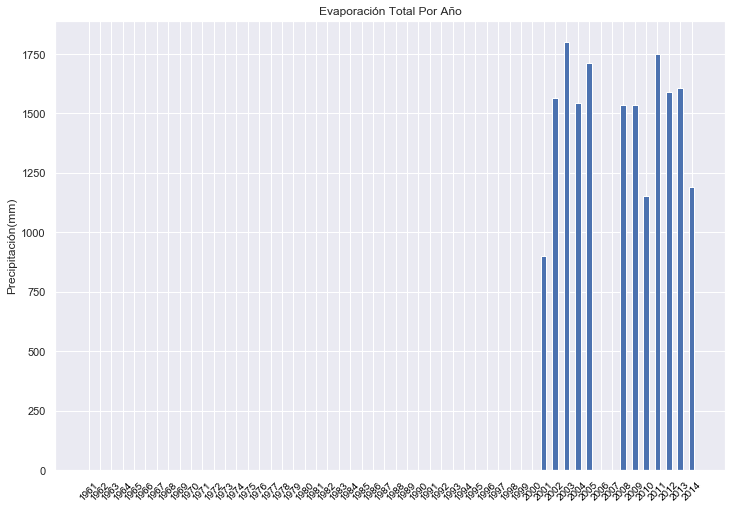

In [39]:
init = 1961
AÑOS = [init + i for i in range(0, 54)]
EAÑO = [ df[df.AÑO==(init + i)].EVAP.sum() for i in range(0, 54)]

d = {'AÑO': AÑOS, 'EVAPORACION_TOTAL': EAÑO}
df2 = pd.DataFrame(data=d)
df2.head()

fecha = AÑOS
N = np.arange(len(fecha))
PRECIPIT= PAÑO
 
plt.bar(N, EAÑO,  width=0.5,align='center')
plt.xticks(N, fecha, size = 'small', color = 'BLACK', rotation=45)
plt.ylabel('Precipitación(mm)')
plt.title('Evaporación Total Por Año')
plt.savefig('Evap_anu',plt=2000)
plt.show()

In [40]:
#Precipitaciones por mes
PRECIP_ENE=df_ENE.PRECIP.mean()
print("ENE = ",PRECIP_ENE)

PRECIP_FEB=df_FEB.PRECIP.mean()
print("FEB = ",PRECIP_FEB)

PRECIP_MAR=df_MAR.PRECIP.mean()
print("MAR = ",PRECIP_MAR)

PRECIP_ABR=df_ABR.PRECIP.mean()
print("ABR = ",PRECIP_ABR)

PRECIP_MAY=df_MAY.PRECIP.mean()
print("MAY = ",PRECIP_MAY)

PRECIP_JUN=df_JUN.PRECIP.mean()
print("JUN = ",PRECIP_JUN)

PRECIP_JUL=df_JUL.PRECIP.mean()
print("JUL = ",PRECIP_JUL)

PRECIP_AGO=df_AGO.PRECIP.mean()
print("AGO = ",PRECIP_AGO)

PRECIP_SEP=df_SEP.PRECIP.mean()
print("SEP = ",PRECIP_SEP)

PRECIP_OCT=df_OCT.PRECIP.mean()
print("OCT = ",PRECIP_OCT)

PRECIP_NOV=df_NOV.PRECIP.mean()
print("NOV = ",PRECIP_NOV)

PRECIP_DIC=df_DIC.PRECIP.mean()
print("DIC = ",PRECIP_DIC)

ENE =  0.5330316742081448
FEB =  0.49967689822294026
MAR =  0.1562408223201175
ABR =  0.2898550724637682
MAY =  1.5741935483870966
JUN =  5.690416666666668
JUL =  6.461009817671813
AGO =  6.403840245775732
SEP =  6.150877192982458
OCT =  2.628136200716846
NOV =  0.5598526703499079
DIC =  0.07255574614065181


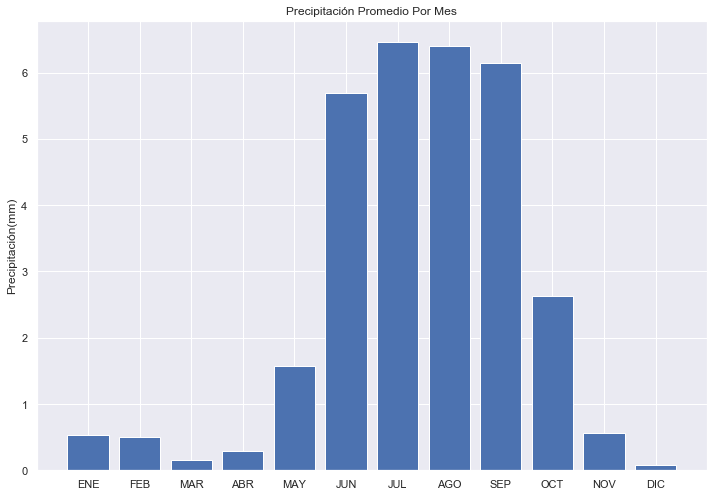

In [41]:
x = ('ENE', 'FEB', 'MAR', 'ABR', 'MAY', 'JUN', 'JUL','AGO','SEP','OCT','NOV','DIC') 
y=np.arange(len(x))
PRECIP= [PRECIP_ENE,PRECIP_FEB,PRECIP_MAR,PRECIP_ABR,PRECIP_MAY,PRECIP_JUN,PRECIP_JUL,PRECIP_AGO,PRECIP_SEP,PRECIP_OCT,PRECIP_NOV,PRECIP_DIC]
 
plt.bar(y, PRECIP, align='center')
plt.xticks(y, x)
plt.ylabel('Precipitación(mm)')
plt.title('Precipitación Promedio Por Mes')
plt.savefig('Precip_prommes',plt=2000)
plt.show()

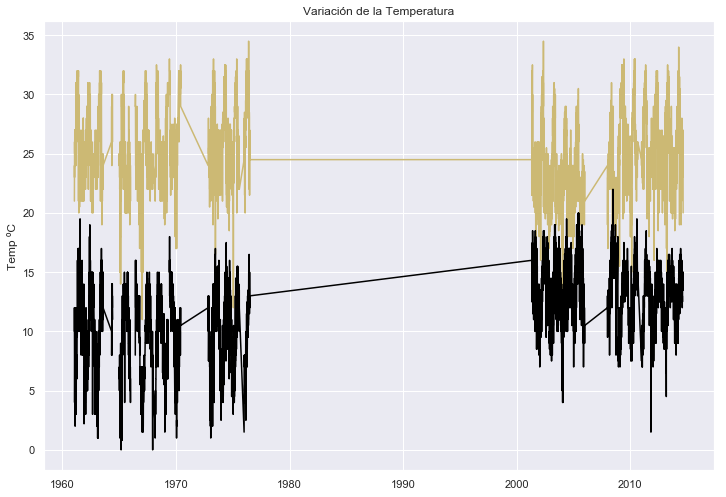

In [42]:
plt.plot_date(x=df.FECHA, y=df.TMAX, fmt="y")
plt.plot_date(x=df.FECHA, y=df.TMIN, fmt="BLACK")
plt.title("Variación de la Temperatura")
plt.ylabel("Temp ºC")
plt.grid(True)
plt.savefig('Var_Temp',plt=2000)
plt.show()

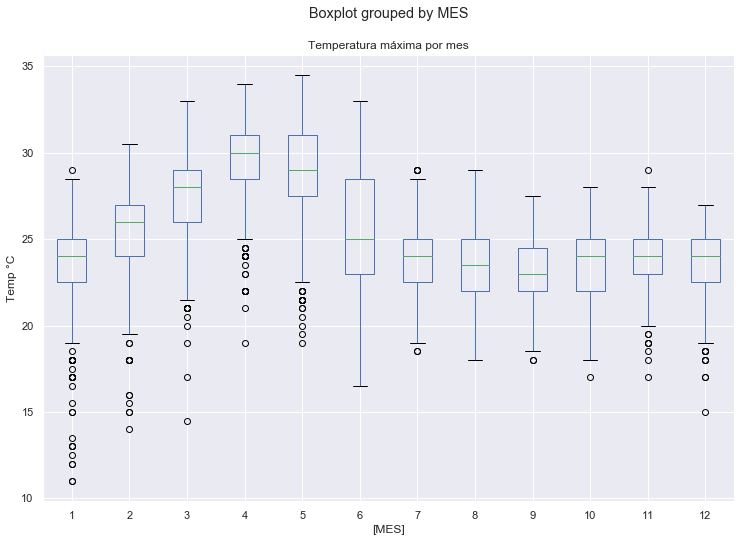

In [43]:
#ax = sns.boxplot(x="MES", y="TMAX", data=df)
#plt.title("Temperatura máxima por mes")
#plt.ylabel ("Temp °C")

df4=pd.DataFrame({"MES" : df.MES, "TMAX" : df.TMAX})
df4.boxplot(by="MES")
plt.title("Temperatura máxima por mes")
plt.ylabel ("Temp °C")
plt.savefig('Temp_maxmen',plt=2000)
plt.show()

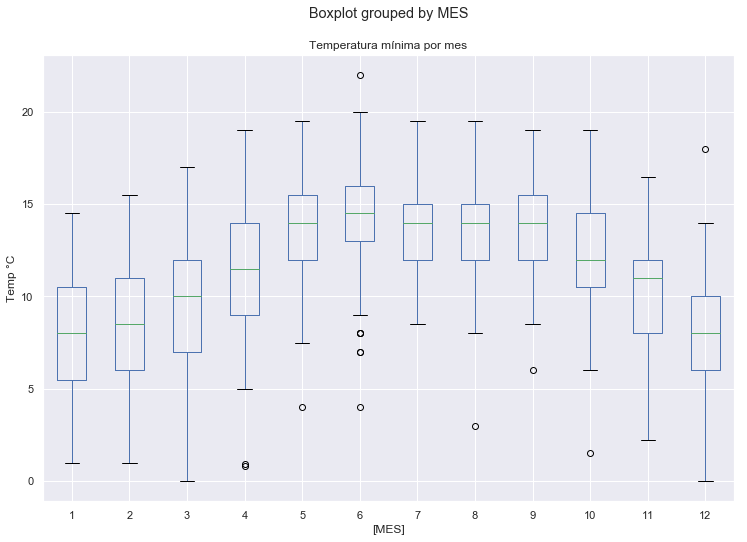

In [44]:
#ax = sns.boxplot(x="MES", y="TMIN", data=df)
#plt.title("Temperatura mínima por mes")
#plt.ylabel ("Temp °C")

df4=pd.DataFrame({"MES" : df.MES, "TMIN" : df.TMIN})
df4.boxplot(by="MES")
plt.title("Temperatura mínima por mes")
plt.ylabel ("Temp °C")
plt.savefig('Temp_minmen',plt=2000)
plt.show()

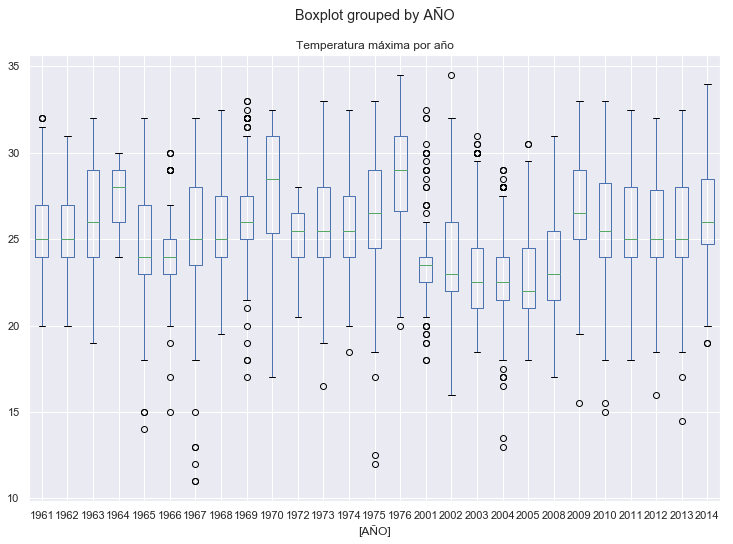

In [45]:
#ax = sns.boxplot(x="AÑO", y="TMAX", data=df)
#plt.xticks(rotation=45)
#plt.title("Temperatura máxima por año")
#plt.ylabel ("Temp °C")

df4=pd.DataFrame({"AÑO" : df.AÑO, "TMAX" : df.TMAX})
df4.boxplot(by="AÑO")
plt.title("Temperatura máxima por año")
plt.savefig('Temp_maxanu',plt=2000)
plt.show()

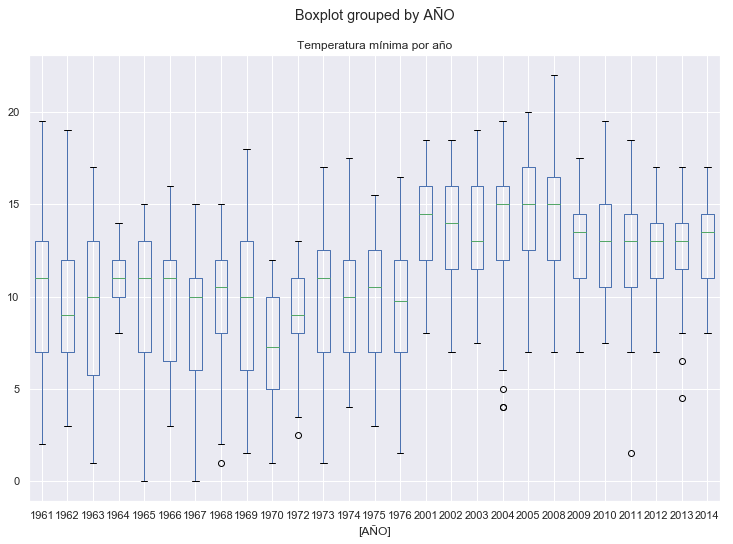

In [46]:
#ax = sns.boxplot(x="AÑO", y="TMIN", data=df)
#plt.xticks(rotation=45)
#plt.title("Temperatura mínima por año")
#plt.ylabel ("Temp °C")

df4=pd.DataFrame({"AÑO" : df.AÑO, "TMIN" : df.TMIN})
df4.boxplot(by="AÑO")
plt.title("Temperatura mínima por año")
plt.savefig('Temp_minanu',plt=2000)
plt.show()

In [47]:
#df4=pd.DataFrame({})
#data=[]
#for i in range (0,54):
  #  j=df[df.AÑO==1961+i].TMIN
 #   df4[1961 +i]=j
    #data.append(j)
#boxplot=df4.boxplot()
#plt.xticks(rotation=45)
#plt.show()
#df4

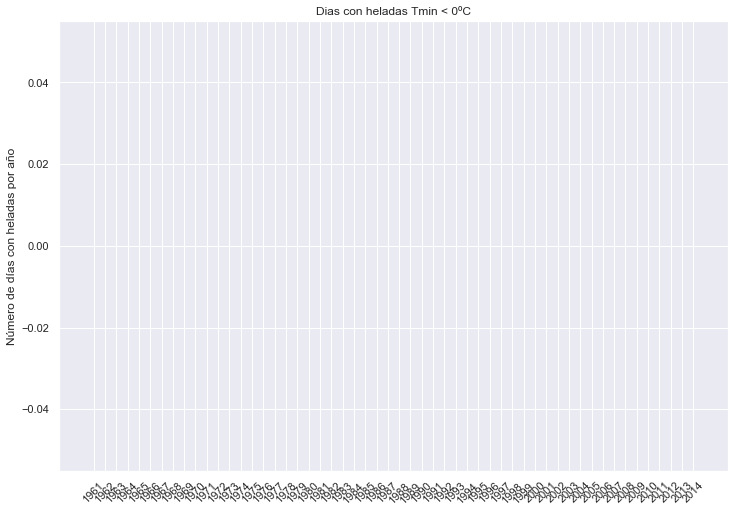

In [48]:
#Dias con heladas tmin<0
data1=[]
data2=[]
for i in range(0, 54):
    init=1961
    count=init + i
    j=df[df.AÑO==(1961+i)].TMIN
    ji=len([1 for i in j if i < 0])
    data1.append(count)
    data2.append(ji)
df3=pd.DataFrame({"AÑO" : data1,"TMIN" : data2})   

x = df3.AÑO
y=np.arange(len(x))
TMIN= df3.TMIN
 
plt.bar(y, TMIN, align='center')
plt.xticks(y, x,rotation=45)
plt.ylabel('Número de días con heladas por año')
plt.title("Dias con heladas Tmin < 0ºC")
plt.savefig('FD',plt=2000)
plt.show()

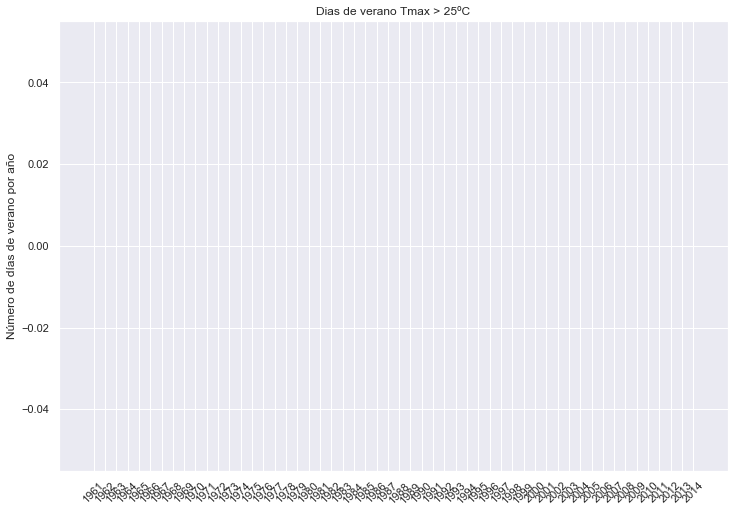

In [49]:
#Dias de verano
data1=[]
data2=[]
for i in range(0, 54):
    init=1961
    count=init + i 
    j=df[df.AÑO==(1961+i)].TMIN
    ji=len([1 for i in j if i > 25])
    data1.append(count)
    data2.append(ji)
df3=pd.DataFrame({"AÑO" : data1, "DVer" : data2})

x=df3.AÑO
y=np.arange(len(x))
DV=df3.DVer

plt.bar(y, DV, align='center')
plt.xticks(y, x,rotation=45)
plt.ylabel('Número de días de verano por año')
plt.title("Dias de verano Tmax > 25ºC")
plt.savefig('SU',plt=2000)
plt.show()

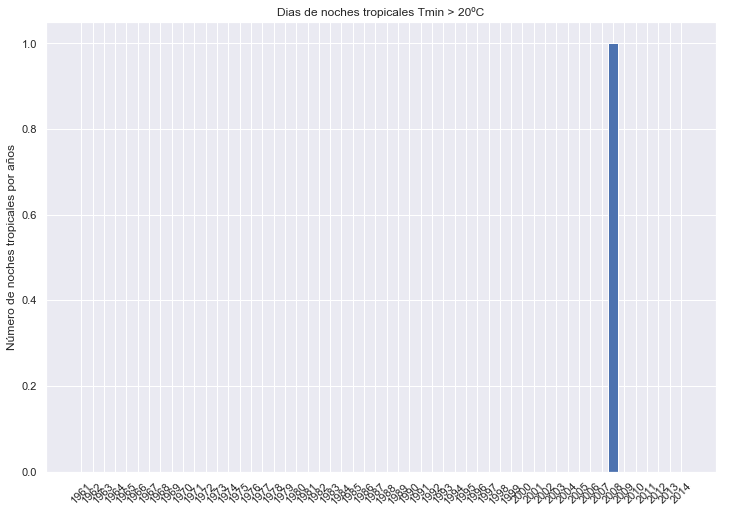

In [50]:
#Número de noches tropicales por año (TR: Tmin > 20ºC)
data1=[]
data2=[]
#print("Año","   Número de noches tropicales por año (TR: Tmin > 20ºC)")
for i in range(0, 54):
    init=1961
    count=init + i 
    j=df[df.AÑO==(1961+i)].TMIN
    ji=len([1 for i in j if i > 20])
    data1.append(count)
    data2.append(ji)
df3=pd.DataFrame({"AÑO" : data1,"TROP" : data2})

x=df3.AÑO
y=np.arange(len(x))
TP=df3.TROP

plt.bar(y, TP, align='center')
plt.xticks(y, x,rotation=45)
plt.ylabel('Número de noches tropicales por años')
plt.title("Dias de noches tropicales Tmin > 20ºC")
plt.savefig('FR',plt=2000)
plt.show()

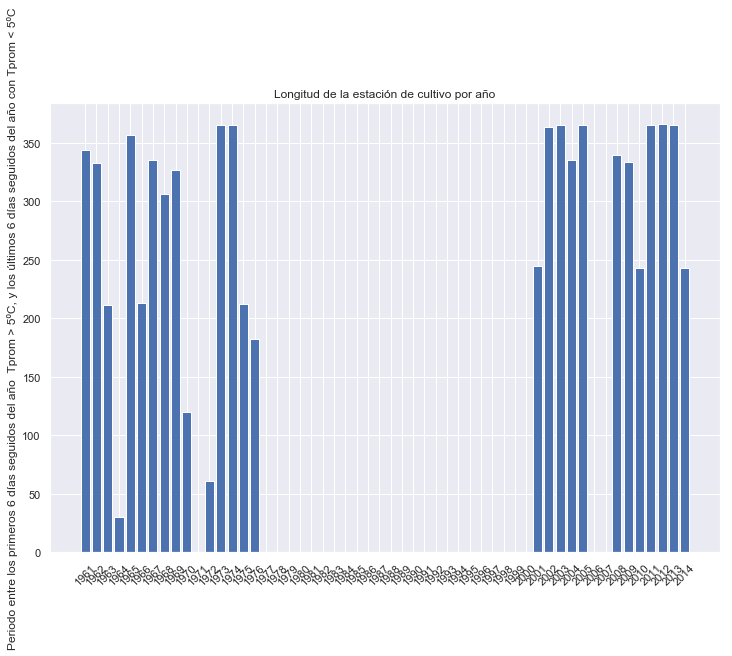

In [51]:
#Longitud de la estación de cultivo por año
#print("Año","   Longitud de la estación de cultivo por año")
data1=[]
data2=[]
for i in range(0, 54):
    init=1961
    count=init + i 
    j=(df[df.AÑO==(1961+i)].TMIN + df[df.AÑO==(1961+i)].TMAX)/2
    ji=len([1 for i in j if i < 5])
    gi=len([1 for i in j if i > 5])
    ci=ji+gi
    j=g=0
    data1.append(count)
    data2.append(ci)
df3=pd.DataFrame({"AÑO" : data1, "CULT" : data2})

x=df3.AÑO
y=np.arange(len(x))
C=df3.CULT

plt.bar(y, C, align='center')
plt.xticks(y, x,rotation=45)
plt.ylabel('Periodo entre los primeros 6 días seguidos del año  Tprom > 5ºC, y los últimos 6 días seguidos del año con Tprom < 5ºC')
plt.title("Longitud de la estación de cultivo por año")
plt.savefig('GSL',plt=2000)
plt.show()

In [52]:
#primdias=[]
#primseis=-1
#df3=pd.DataFrame({"TPROM" : (df.TMAX + df.TMIN)/2 })
#for j in range (df["AÑO"][0],df["AÑO"][len(df)-1]+1):
#    for i in range (5, len(df)-1):
#        if (df["AÑO"][i-5]==j):
#            if(df3["TPROM"][i-5] > 5 and df3["TPROM"][i-4] > 5 and df3["TPROM"][i-3] > 5 and df3["TPROM"][i-2] > 5 and
#              df3["TPROM"][i-1] > 5 and df3["TPROM"][i] > 5):
#                primseis=i
#                break
#    if(primseis != -1):
#        primdias.append(primseis)
#        primseis=-1
#    else:
#        primdias.append("NA")
#primdias

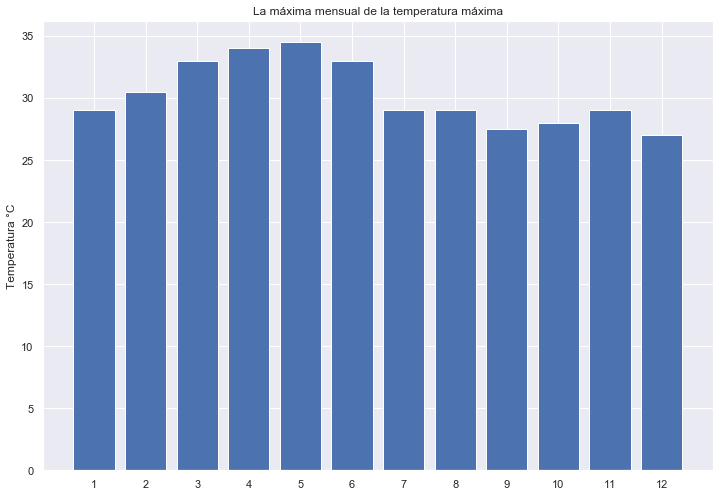

In [53]:
#TXx: La máxima mensual de la temperatura máxima, max(Tmax).
#print("Mes","Máxima mensual de la temperatura máxima, max(Tmax)")
data1=[]
data2=[]
for i in range(0, 12):
    init=1
    count=init + i 
    j=df[df.MES==(init+i)].TMAX.max()
    data1.append(count)
    data2.append(j)
df3=pd.DataFrame({"MES" : data1, "maxTMAX" : data2})

x=df3.MES
y=np.arange(len(x))
Tmax=df3.maxTMAX

plt.bar(y, Tmax, align='center')
plt.xticks(y, x)
plt.ylabel('Temperatura °C')
plt.title("La máxima mensual de la temperatura máxima")
plt.savefig('TXx',plt=2000)
plt.show()

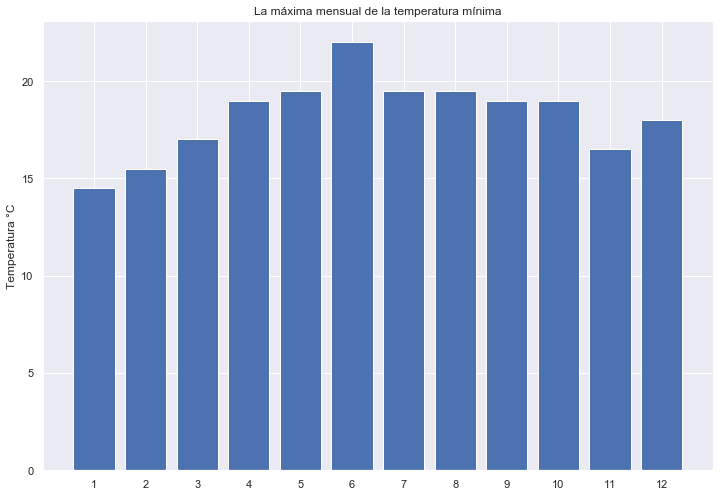

In [54]:
#TNx. La máxima mensual de la temperatura mínima, max(Tmin).
#print("Mes","Máximo mensual de la temperatura mínima, max(Tmin)")
data1=[]
data2=[]
for i in range(0, 12):
    init=1
    count=init + i
    j=df[df.MES==(init+i)].TMIN.max()
    data1.append(count)
    data2.append(j)
df3=pd.DataFrame({"MES" : data1, "maxTMIN" : data2})

x=df3.MES
y=np.arange(len(x))
Tmin=df3.maxTMIN

plt.bar(y, Tmin, align='center')
plt.xticks(y, x)
plt.ylabel('Temperatura °C')
plt.title("La máxima mensual de la temperatura mínima")
plt.savefig('TNx',plt=2000)
plt.show()

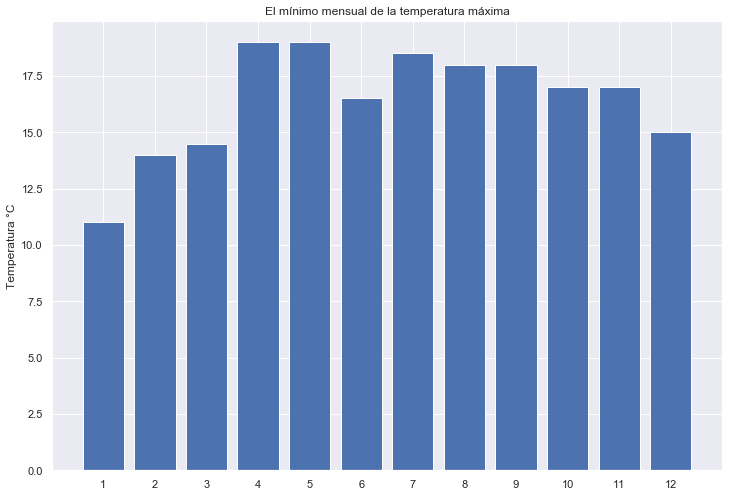

In [55]:
#TXn: El mínimo mensual de la temperatura máxima, min(Tmax).
data1=[]
data2=[]
for i in range(0, 12):
    data1.append((1+i))
    j=df[df.MES==(init+i)].TMAX.min()
    data2.append(j)
df3=pd.DataFrame({ "MES" : data1, "minTMAX" : data2})    
x = df3.MES
y=np.arange(len(x))
minTMAX= df3.minTMAX
 
plt.bar(y, minTMAX, align='center')
plt.xticks(y, x)
plt.ylabel('Temperatura °C')
plt.title("El mínimo mensual de la temperatura máxima")
plt.savefig('TXn',plt=2000)
plt.show()

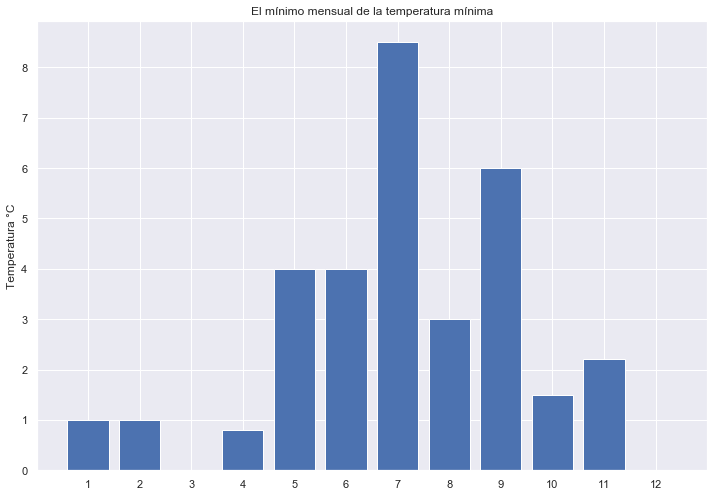

In [56]:
#TNn: El mínimo mensual de la temperatura mínima, min(Tmin).
#print("Mes","Mínimo mensual de la temperatura mínima, min(Tmin)")
data1=[]
data2=[]
for i in range(0, 12):
    init=1
    count=init + i
    j=df[df.MES==(init+i)].TMIN.min()
    data1.append(count)
    data2.append(j)
df3=pd.DataFrame({"MES" : data1, "minTMIN" : data2})

x=df3.MES
y=np.arange(len(x))
TMIN=df3.minTMIN

plt.bar(y, TMIN, align='center')
plt.xticks(y, x)
plt.ylabel('Temperatura °C')
plt.title("El mínimo mensual de la temperatura mínima")
plt.savefig('TNn',plt=2000)
plt.show()

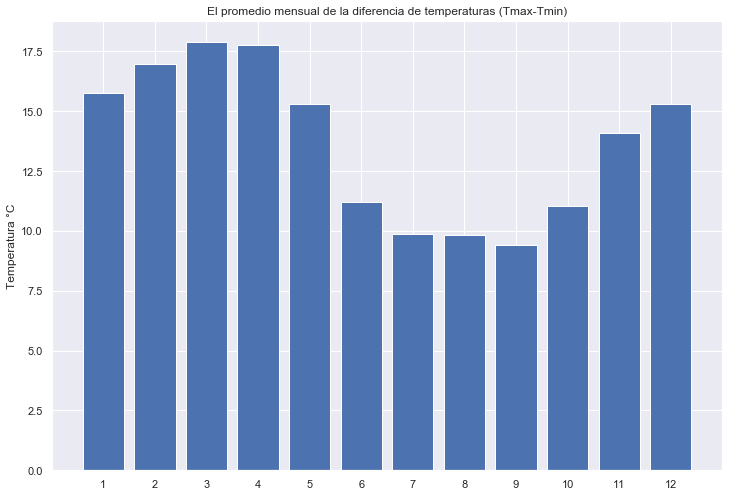

In [57]:
#DTR: El promedio mensual de la diferencia de temperaturas (Tmax-Tmin). 
#print("Mes","Promedio mensual de la diferencia de temperaturas (Tmax-Tmin)")
data1=[]
data2=[]
df2=pd.DataFrame({ 'MES' : df.MES, "DIF" : df.TMAX - df.TMIN})
for i in range(0, 12):
    init=1
    count=init + i
    j=df2[df2.MES==(init+i)].DIF.mean()
    data1.append(count)
    data2.append(j)
df3=pd.DataFrame({"MES" : data1, "PMES" : data2})

x=df3.MES
y=np.arange(len(x))
p=df3.PMES

plt.bar(y, p, align='center')
plt.xticks(y, x)
plt.ylabel('Temperatura °C')
plt.title("El promedio mensual de la diferencia de temperaturas (Tmax-Tmin)")
plt.savefig('DTR',plt=2000)
plt.show()

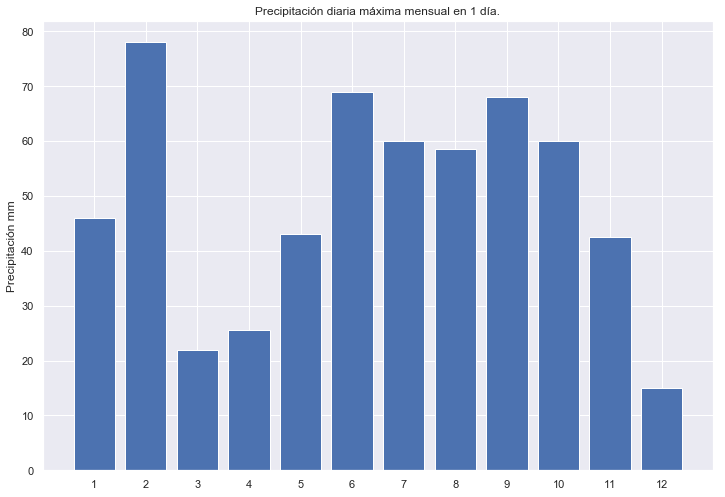

In [58]:
#Rx1day: Precipitación diaria máxima mensual en 1 día. 
#print("Mes","Precipitación máxima mensual")
data1=[]
data2=[]
for i in range(0, 12):
    init=1
    count=init + i
    j=df[df.MES==(init+i)].PRECIP.max()
    data1.append(count)
    data2.append(j)
df3=pd.DataFrame({"MES" : data1, "PRECIP" : data2})

x=df3.MES
y=np.arange(len(x))
p=df3.PRECIP

plt.bar(y, p, align='center')
plt.xticks(y, x)
plt.ylabel('Precipitación mm')
plt.title("Precipitación diaria máxima mensual en 1 día.")
plt.savefig('Rx1day',plt=2000)
plt.show()

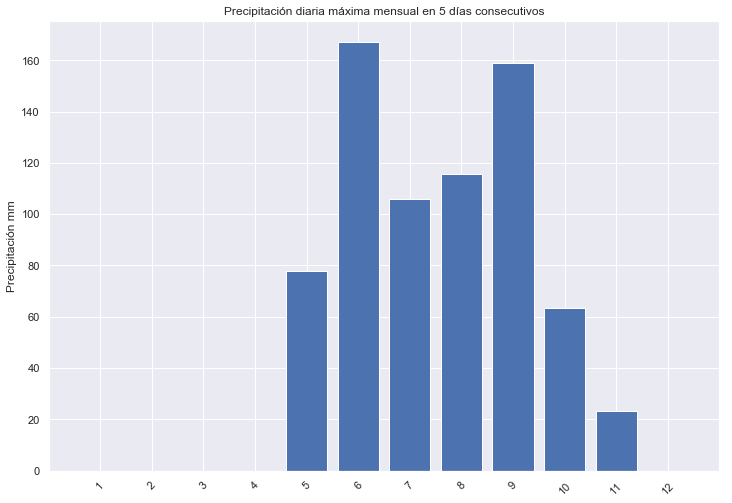

In [59]:
#Rx5 day: Precipitación diaria máxima mensual en 5 días consecutivos.
datos1=[]
datos2=[]
datos3=[]
pmax=[]
count=[]
p=[]
meses=[]

for i in range (0,54):
    df3=pd.DataFrame({"MES" : df[df.AÑO==(1961+i)].MES, "PRECIP" : df[df.AÑO==(1961+i)].PRECIP})
    for j in range (0,12):
        count.append(j+1)
        df4=pd.DataFrame({"PRECIP" : df3[df3.MES==j+1].PRECIP})
        k=len(df4)
        df4.index = np.arange(0,k) 
        for c in range (0,k-5):
            j1=df4.PRECIP[c]
            j2=df4.PRECIP[c+1]
            j3=df4.PRECIP[c+2]
            j4=df4.PRECIP[c+3]
            j5=df4.PRECIP[c+4]
            if (j1 != 0.0 and j2 != 0.0 and j3 != 0.0 and j4 != 0.0 and j5 != 0.0):
                v= j1+j2+j3+j4+j5
                datos2.append(v)    
            else:
                datos2.append(0)
        df5=pd.DataFrame({"P" : datos2})
        s=df5.P.max()
        pmax.append(s)
        datos2=[]
for i in range (0,54):
    for x in range (0,12):
        meses.append(x+1)
df7=pd.DataFrame({"MES" : meses, "P5" : pmax})
meses=[]
count=[]
for i in range(0,12):
    count.append(i+1)
    l=df7[df7.MES==i+1].P5.max()
    meses.append(l)
df8=pd.DataFrame({"MES" : count, "Pmax5" : meses})

x=df8.MES
y=np.arange(len(x))
p=df8.Pmax5

plt.bar(y, p, align='center')
plt.xticks(y, x, rotation=45)
plt.ylabel('Precipitación mm')
plt.title("Precipitación diaria máxima mensual en 5 días consecutivos")
plt.savefig('Rx5day',plt=2000)
plt.show()
#sucedio en 1977

In [60]:
df3=df[df.MES==10].PRECIP
df3.max()

60.0

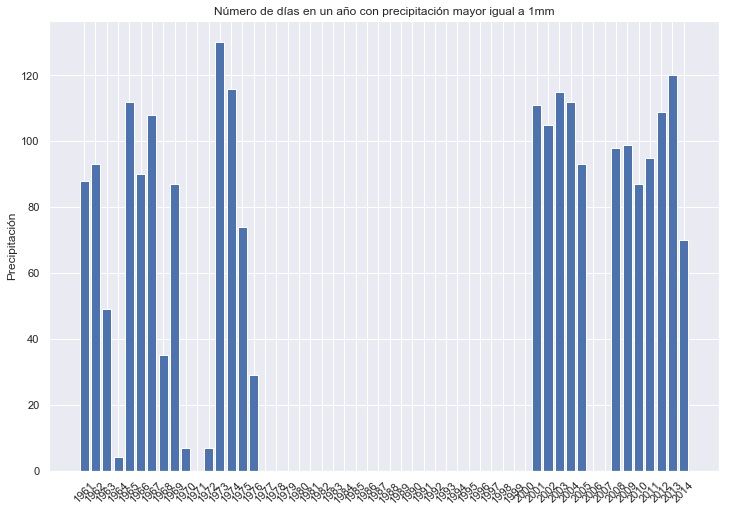

In [61]:
#SDII: Número de días en un año con precipitación mayor igual a 1mm
#print("Año","   Número de días en un año con precipitación mayor igual a 1mm")
data1=[]
data2=[]
for i in range(0, 54):
    init=1961
    count=init + i
    j=df[df.AÑO==(1961+i)].PRECIP
    ji=len([1 for i in j if i >= 1])
    data1.append(count)
    data2.append(ji)
df3=pd.DataFrame({"AÑO" : data1, "Precip" : data2})

x=df3.AÑO
y=np.arange(len(x))
p=df3.Precip

plt.bar(y, p, align='center')
plt.xticks(y, x, rotation=45)
plt.ylabel('Precipitación')
plt.title("Número de días en un año con precipitación mayor igual a 1mm")
plt.savefig('SDII',plt=2000)
plt.show()

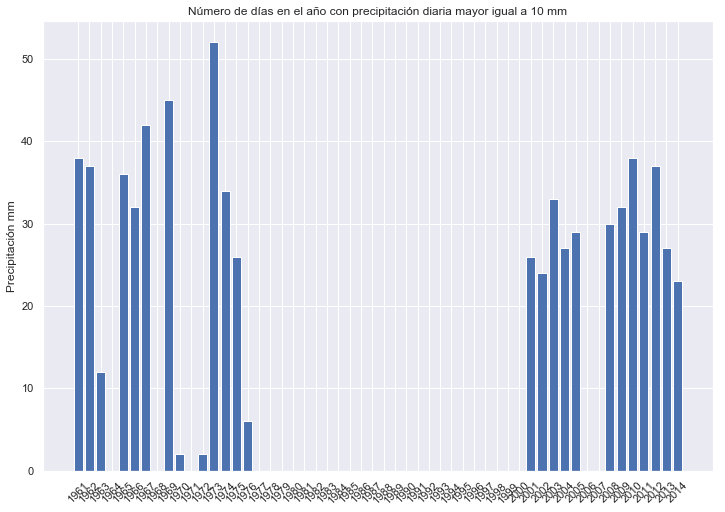

In [62]:
#R10mm: Número de días en el año con precipitación diaria mayor igual a 10 mm.  
#print("Año","   Número de días en el año con precipitación diaria mayor igual a 10 mm.")
data1=[]
data2=[]
for i in range(0, 54):
    init=1961
    count=init + i
    j=df[df.AÑO==(1961+i)].PRECIP
    ji=len([1 for i in j if i >= 10])
    data1.append(count)
    data2.append(ji)
df3=pd.DataFrame({"AÑO" : data1, "Num" : data2})
df3

x=df3.AÑO
y=np.arange(len(x))
p=df3.Num

plt.bar(y, p, align='center')
plt.xticks(y, x, rotation=45)
plt.ylabel('Precipitación mm')
plt.title("Número de días en el año con precipitación diaria mayor igual a 10 mm")
plt.savefig('R10mm',plt=2000)
plt.show()

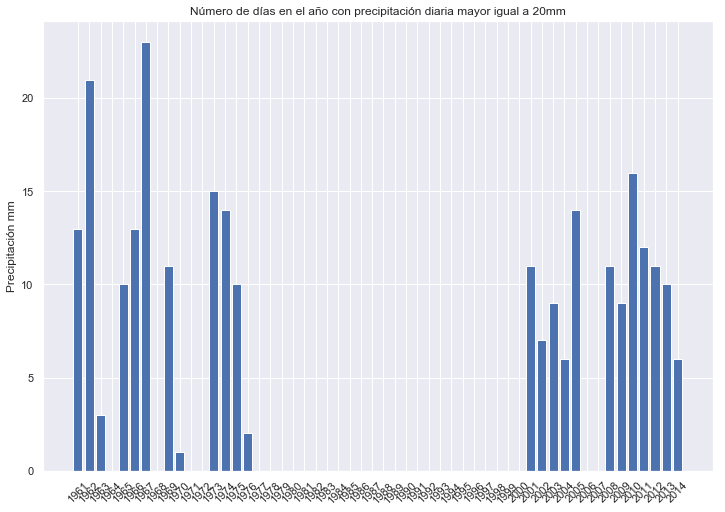

In [63]:
#R20mm: Número de días en el año con precipitación diaria mayor igual a 20mm.
#print("Año","   Número de días en el año con precipitación diaria mayor igual a 20mm.")
data1=[]
data2=[]
for i in range(0, 54):
    init=1961
    count=init + i
    j=df[df.AÑO==(1961+i)].PRECIP
    ji=len([1 for i in j if i >= 20])
    data1.append(count)
    data2.append(ji)
df3=pd.DataFrame({"AÑO" : data1, "Num" : data2})

x=df3.AÑO
y=np.arange(len(x))
p=df3.Num

plt.bar(y, p, align='center')
plt.xticks(y, x, rotation=45)
plt.ylabel('Precipitación mm')
plt.title("Número de días en el año con precipitación diaria mayor igual a 20mm")
plt.savefig('R20mm',plt=2000)
plt.show()

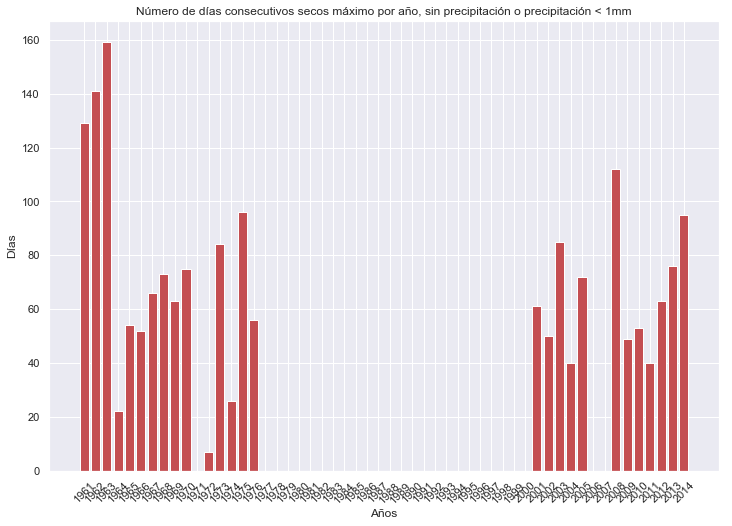

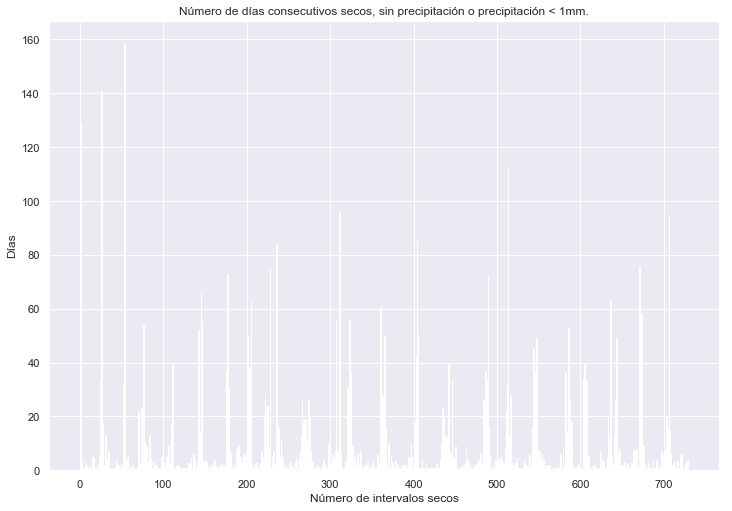

In [64]:
#CDD: Número de días consecutivos secos, sin precipitación o precipitación < 1mm.

datos1=[]
datos2=[]
datos3=[]
count=[]
p=[]
v=b=c=0
for i in range (0,54):
    p.append(1961+i)
    df3=pd.DataFrame({"PRECIP" : df[df.AÑO==1961+i].PRECIP})
    k=len(df3)
    df3.index = np.arange(0,k) 
    for c in range (0,k):
        j1=df3.PRECIP[c]
            
        if (j1 < 1):
            v= v+1
        else:
            b=b+1
            if (v !=0):
                datos1.append(v)
                datos2.append(v)
            v=0
    df4=pd.DataFrame({"P" : datos2})
    f=df4.P.max()
    datos3.append(f)
    datos2=[]
    
    df4=pd.DataFrame({"AÑO" : p, "NOPRECIP" : datos3})

x=df4.AÑO
y=np.arange(len(df4))
p=df4.NOPRECIP

plt.bar(y,p, align='center', color="r")
plt.xticks(y, x, rotation=45)
plt.xlabel("Años")
plt.ylabel('Días')
plt.title("Número de días consecutivos secos máximo por año, sin precipitación o precipitación < 1mm")
plt.savefig('CDD',plt=2000)
plt.show()

df5=pd.DataFrame({"NOPRECIP" : datos1})
for i in range (0, len(df5)):
    count.append(i)
    
df5=pd.DataFrame({"N" : count, "NOPRECIP" : datos1})


x=df5.N
y=np.arange(len(df5))
p=df5.NOPRECIP

plt.bar(y,p, align='center', color="r")
plt.xlabel("Número de intervalos secos")
plt.ylabel('Días')
plt.title("Número de días consecutivos secos, sin precipitación o precipitación < 1mm.")
plt.savefig('CDD1',plt=2000)
plt.show()

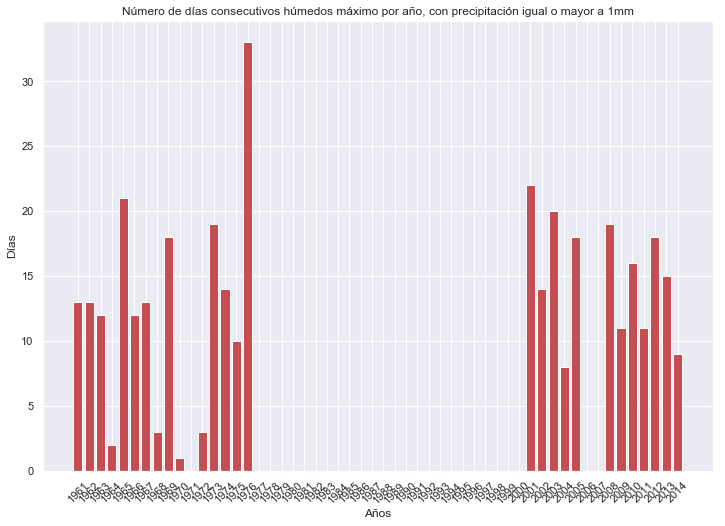

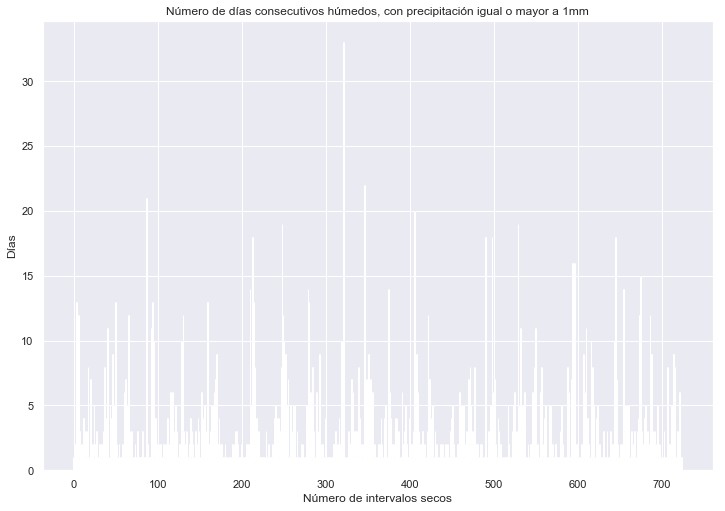

In [65]:
#CWD: Número de días consecutivos húmedos, con precipitación igual o mayor a 1mm. 

datos1=[]
datos2=[]
datos3=[]
count=[]
p=[]
v=b=c=0
for i in range (0,54):
    p.append(1961+i)
    df3=pd.DataFrame({"PRECIP" : df[df.AÑO==1961+i].PRECIP})
    k=len(df3)
    df3.index = np.arange(0,k) 
    for c in range (0,k):
        j1=df3.PRECIP[c]
            
        if (j1 >= 1):
            v= v+1
        else:
            b=b+1
            if (v !=0):
                datos1.append(v)
                datos2.append(v)
            v=0
    df4=pd.DataFrame({"P" : datos2})
    f=df4.P.max()
    datos3.append(f)
    datos2=[]
    
    df4=pd.DataFrame({"AÑO" : p, "NOPRECIP" : datos3})

x=df4.AÑO
y=np.arange(len(df4))
p=df4.NOPRECIP

plt.bar(y,p, align='center', color="r")
plt.xticks(y, x, rotation=45)
plt.xlabel("Años")
plt.ylabel('Días')
plt.title("Número de días consecutivos húmedos máximo por año, con precipitación igual o mayor a 1mm")
plt.savefig('CWD',plt=2000)
plt.show()


df5=pd.DataFrame({"NOPRECIP" : datos1})
for i in range (0, len(df5)):
    count.append(i)
    
df5=pd.DataFrame({"N" : count, "NOPRECIP" : datos1})


x=df5.N
y=np.arange(len(df5))
p=df5.NOPRECIP

plt.bar(y,p, align='center', color="r")
plt.xlabel("Número de intervalos secos")
plt.ylabel('Días')
plt.title("Número de días consecutivos húmedos, con precipitación igual o mayor a 1mm")
plt.savefig('CWD1',plt=2000)
plt.show()